# Complete E-commerce Data Exploration

## Goal: Understand the Complete Business Ecosystem
**Explore ALL available datasets** to understand:
- **Transactions** - Orders, items, payments, reviews
- **Customers** - Behavior, geography, purchasing patterns  
- **Sellers** - Performance, distribution
- **Products** - Categories, pricing, demand patterns
- **Business Flow** - Customer journey from order to review

## Why Complete Exploration Matters
- **Rich context** for demand forecasting models
- **Customer behavior insights** affect seasonality patterns
- **Seller patterns** impact product availability and pricing
- **Payment/review data** reveals transaction quality and success rates
- **Geographic patterns** may drive regional demand differences

## Approach: Systematic Business Analysis
Explore each dataset individually, then analyze relationships and business patterns through clear visualizations.


In [2]:
# data science imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
import random
warnings.filterwarnings('ignore')

# Random palette selection - KISS approach
palette_options = ['viridis', 'plasma', 'Paired', 'colorblind']
chosen_palette = random.choice(palette_options)

# plotting configuration
plt.style.use('seaborn-v0_8')
sns.set_palette(chosen_palette)
plt.rcParams['figure.figsize'] = (12, 6)

print('Libraries imported.')


Libraries imported.


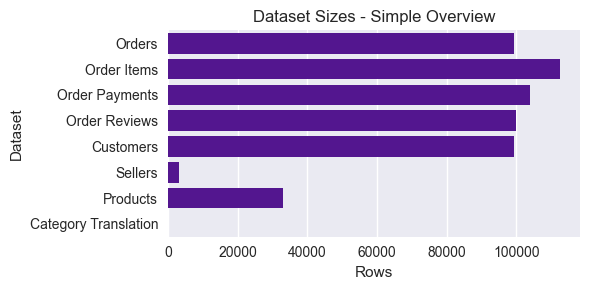

Data loaded successfully ✓


In [10]:
# Load datasets
orders = pd.read_csv('../data/orders.csv')
order_items = pd.read_csv('../data/order_items.csv')
order_payments = pd.read_csv('../data/order_payments.csv')
order_reviews = pd.read_csv('../data/order_reviews.csv')
customers = pd.read_csv('../data/customers.csv')
sellers = pd.read_csv('../data/sellers.csv')
products = pd.read_csv('../data/products.csv')
category_translation = pd.read_csv('../data/product_category_name_translation.csv')

# Simple dataset overview visualization
datasets = {
    'Orders': orders,
    'Order Items': order_items,
    'Order Payments': order_payments,
    'Order Reviews': order_reviews,
    'Customers': customers,
    'Sellers': sellers,
    'Products': products,
    'Category Translation': category_translation
}

# Visualize dataset sizes
dataset_sizes = pd.DataFrame({
    'Dataset': list(datasets.keys()),
    'Rows': [len(df) for df in datasets.values()]
})

plt.figure(figsize=(6, 3))
sns.barplot(data=dataset_sizes, x='Rows', y='Dataset')
plt.title('Dataset Sizes - Simple Overview')
plt.tight_layout()
plt.show()

print("Data loaded successfully ✓")

In [11]:
# Quick data peek - follow the rules!
orders.head()


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [12]:
# Basic info check
order_items.head()


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


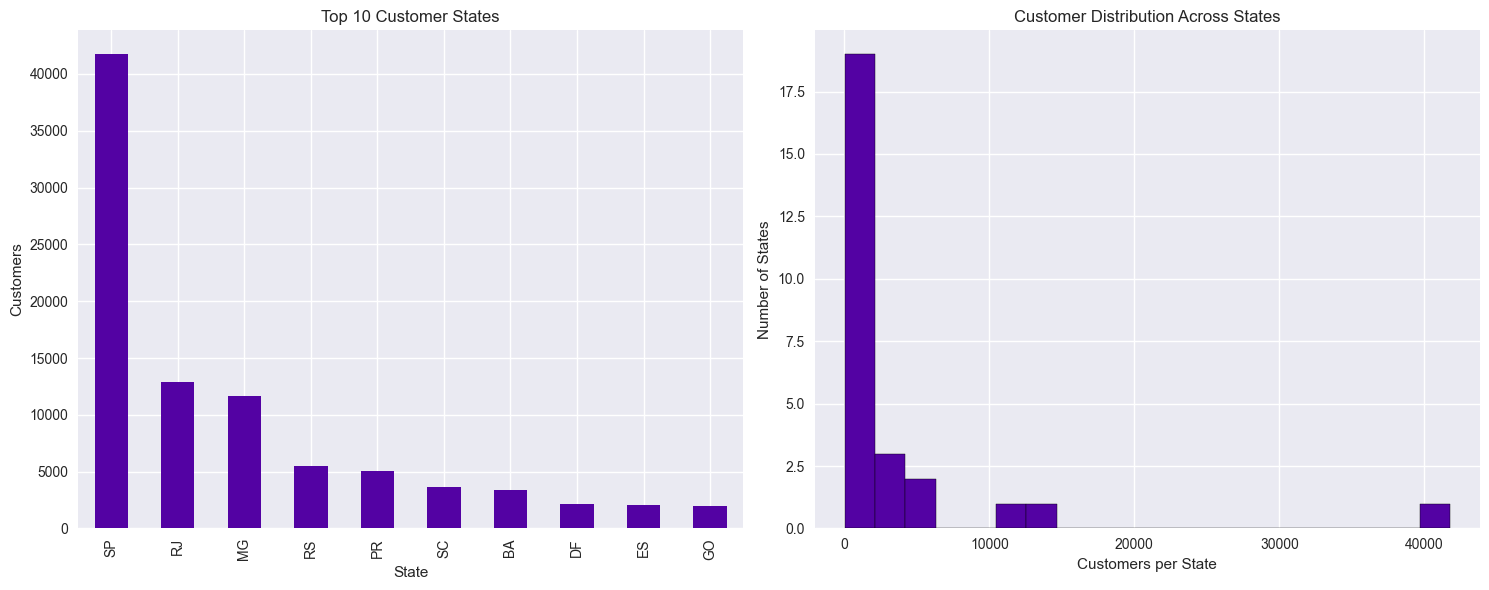

In [13]:
# Customer Geographic Distribution - Simple Viz
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Top states
customers['customer_state'].value_counts().head(10).plot(kind='bar', ax=ax1)
ax1.set_title('Top 10 Customer States')
ax1.set_xlabel('State')
ax1.set_ylabel('Customers')

# Geographic spread
state_counts = customers['customer_state'].value_counts()
ax2.hist(state_counts, bins=20, edgecolor='black')
ax2.set_title('Customer Distribution Across States')
ax2.set_xlabel('Customers per State')
ax2.set_ylabel('Number of States')

plt.tight_layout()
plt.show()


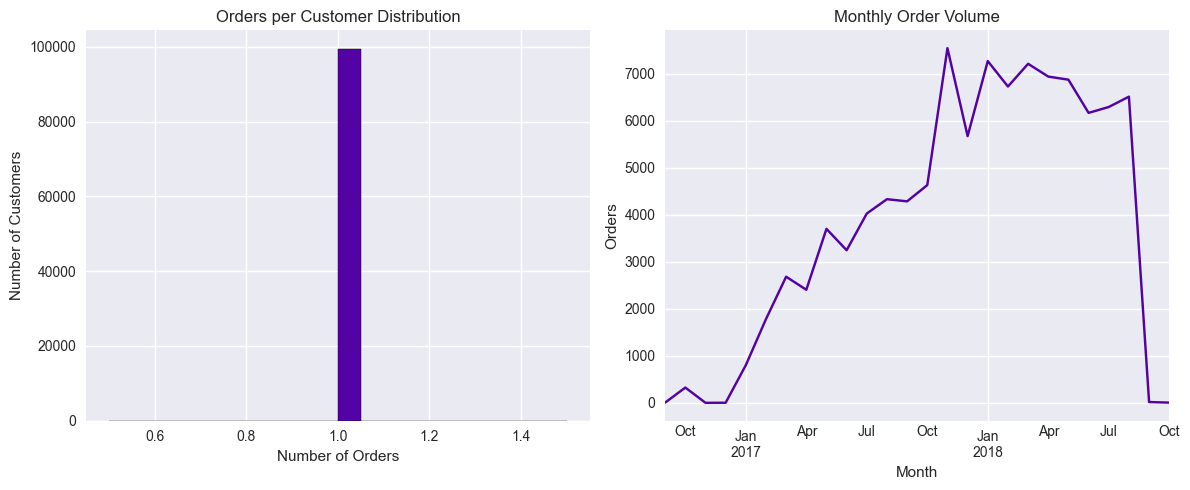

Total customers: 99,441
Average orders per customer: 1.0
Repeat customers: 0


In [14]:
# Customer Behavior - Simple Analysis
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])

# Orders per customer
customer_orders = orders.groupby('customer_id').size()

plt.figure(figsize=(12, 5))

# Simple histogram of order frequency
plt.subplot(1, 2, 1)
customer_orders.plot(kind='hist', bins=20, edgecolor='black')
plt.title('Orders per Customer Distribution')
plt.xlabel('Number of Orders')
plt.ylabel('Number of Customers')

# Order timeline
plt.subplot(1, 2, 2)
orders.set_index('order_purchase_timestamp').resample('M').size().plot()
plt.title('Monthly Order Volume')
plt.xlabel('Month')
plt.ylabel('Orders')

plt.tight_layout()
plt.show()

# Simple summary - no complex prints
print(f"Total customers: {len(customer_orders):,}")
print(f"Average orders per customer: {customer_orders.mean():.1f}")
print(f"Repeat customers: {(customer_orders > 1).sum():,}")


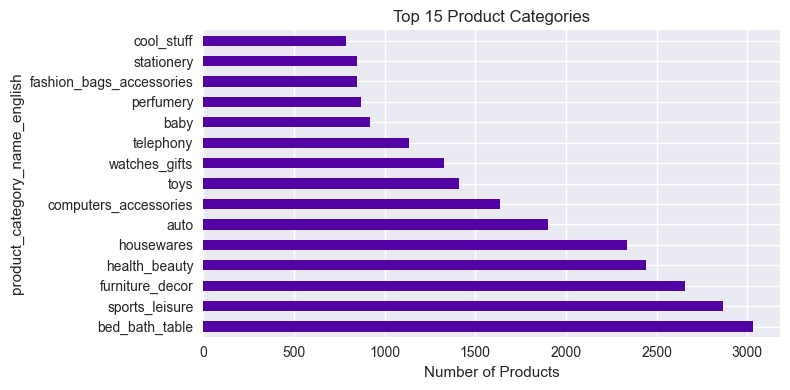

Total products: 32,951
Product categories: 71
Products with English names: 32,328


In [15]:
# Product Categories - Simple Overview
# Join products with translations
products_eng = products.merge(category_translation, 
                              left_on='product_category_name', 
                              right_on='product_category_name', 
                              how='left')

plt.figure(figsize=(8, 4))

# Top categories
category_counts = products_eng['product_category_name_english'].value_counts().head(15)
category_counts.plot(kind='barh')
plt.title('Top 15 Product Categories')
plt.xlabel('Number of Products')

plt.tight_layout()
plt.show()

print(f"Total products: {len(products):,}")
print(f"Product categories: {len(category_translation):,}")
print(f"Products with English names: {products_eng['product_category_name_english'].notna().sum():,}")


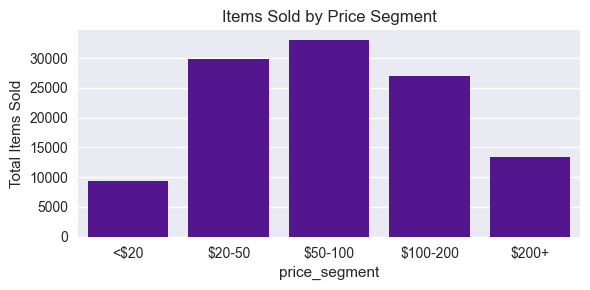

In [16]:
# Demand by Price Ranges
price_bins = pd.cut(order_items['price'], bins=20)
demand_by_price = price_bins.value_counts().sort_index()

order_items['price_segment'] = pd.cut(order_items['price'], 
                                     bins=[0, 20, 50, 100, 200, float('inf')], 
                                     labels=['<$20', '$20-50', '$50-100', '$100-200', '$200+'])
segment_demand = order_items.groupby('price_segment').size()
plt.figure(figsize=(6, 3))
sns.barplot(x=segment_demand.index, y=segment_demand.values)
plt.title('Items Sold by Price Segment')
plt.ylabel('Total Items Sold')
plt.tight_layout()
plt.show()



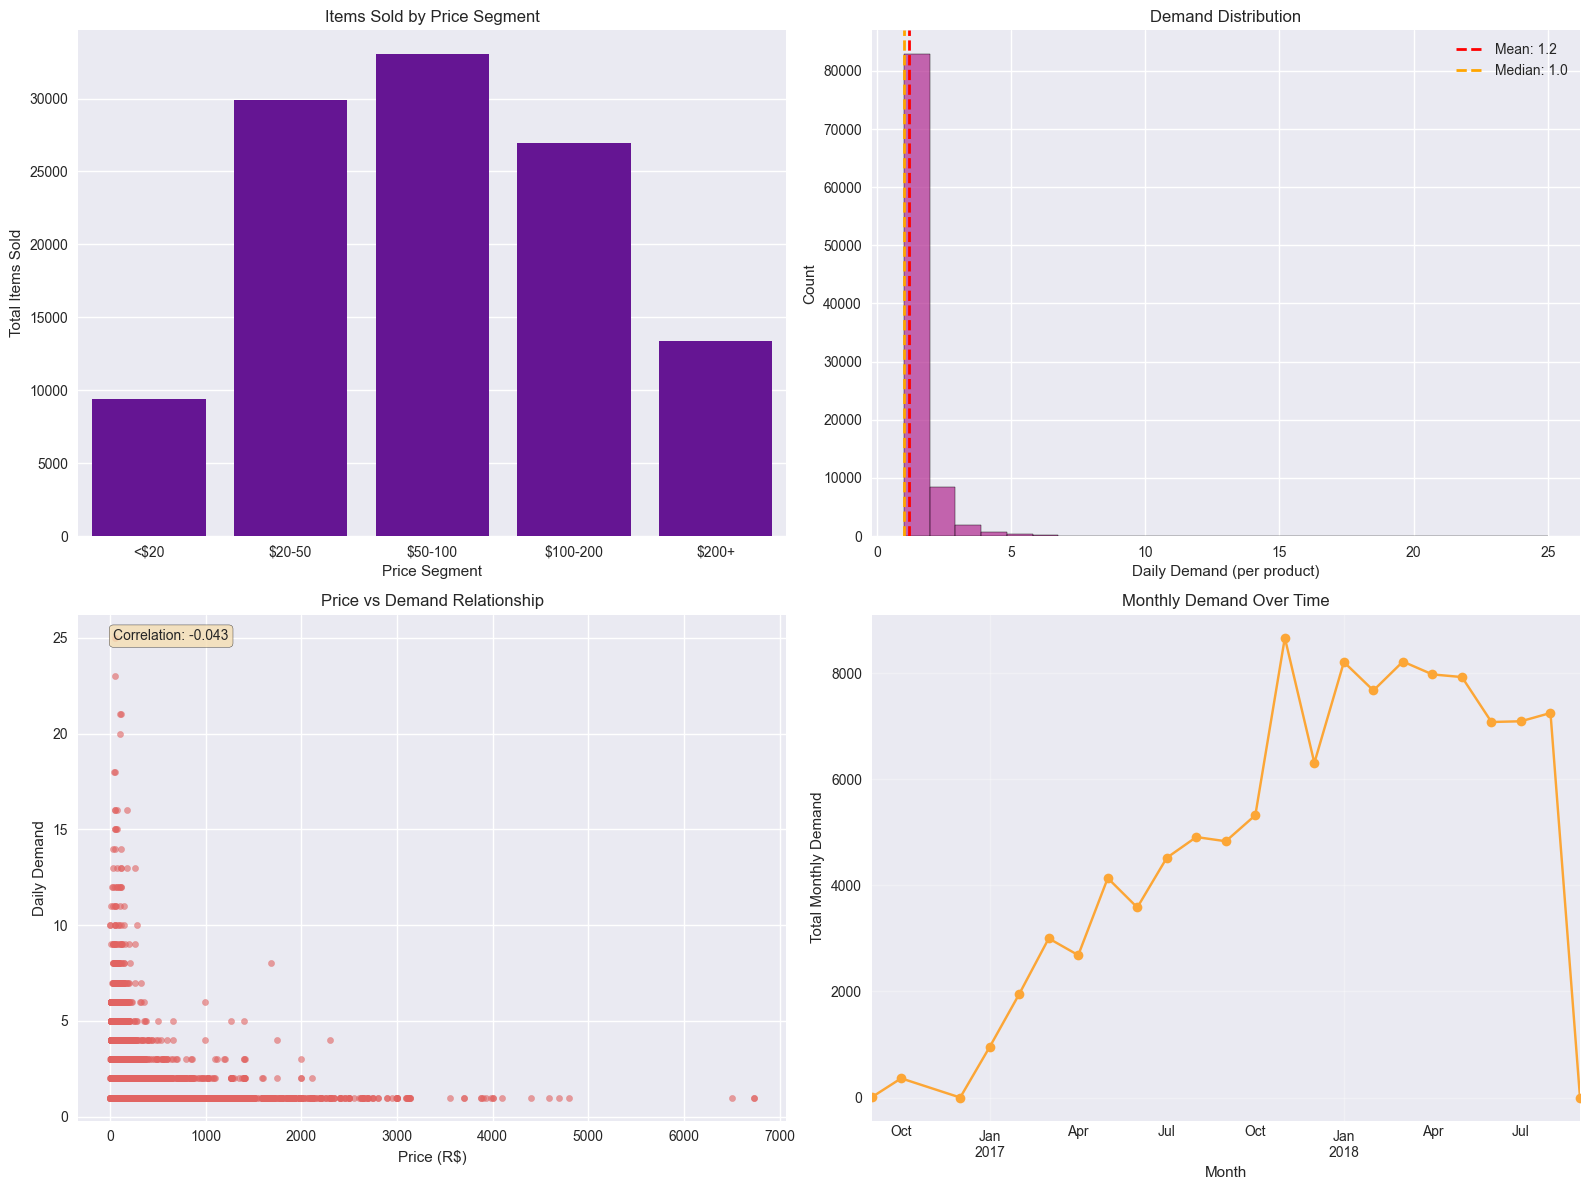

In [17]:
# Prepare data for comprehensive analysis
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])

# Join orders and order_items
demand_data = order_items.merge(orders[['order_id', 'order_purchase_timestamp']], on='order_id')
demand_data['date'] = demand_data['order_purchase_timestamp'].dt.date

# Daily demand per product
daily_demand = demand_data.groupby(['product_id', 'date']).size().reset_index(name='daily_demand')

# Price segments for analysis
order_items['price_segment'] = pd.cut(order_items['price'], 
                                     bins=[0, 20, 50, 100, 200, float('inf')], 
                                     labels=['<$20', '$20-50', '$50-100', '$100-200', '$200+'])


fig, axes = plt.subplots(2, 2, figsize=(16, 12))
colors = sns.color_palette(chosen_palette, 4)

# 1. Price Segment Analysis
segment_demand = order_items.groupby('price_segment').size()
sns.barplot(x=segment_demand.index, y=segment_demand.values, ax=axes[0,0], color=colors[0])
axes[0,0].set_title('Items Sold by Price Segment')
axes[0,0].set_xlabel('Price Segment')
axes[0,0].set_ylabel('Total Items Sold')

# 2. Demand Distribution with mean/median
sns.histplot(daily_demand['daily_demand'], bins=25, alpha=0.7, ax=axes[0,1], color=colors[1])
mean_val = daily_demand['daily_demand'].mean()
median_val = daily_demand['daily_demand'].median()
axes[0,1].axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.1f}')
axes[0,1].axvline(median_val, color='orange', linestyle='--', linewidth=2, label=f'Median: {median_val:.1f}')
axes[0,1].set_title('Demand Distribution')
axes[0,1].set_xlabel('Daily Demand (per product)')
axes[0,1].legend()

# 3. Price vs Demand Relationship
product_prices = order_items.groupby('product_id')['price'].mean().reset_index()
demand_price = daily_demand.merge(product_prices, on='product_id')
correlation = demand_price['price'].corr(demand_price['daily_demand'])
axes[1,0].scatter(demand_price['price'], demand_price['daily_demand'], alpha=0.6, s=20, color=colors[2])
axes[1,0].set_title('Price vs Demand Relationship')
axes[1,0].set_xlabel('Price (R$)')
axes[1,0].set_ylabel('Daily Demand')
axes[1,0].text(0.05, 0.95, f'Correlation: {correlation:.3f}', 
               transform=axes[1,0].transAxes, 
               bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

# 4. Monthly Demand Over Time
daily_demand['date'] = pd.to_datetime(daily_demand['date'])
monthly_demand = daily_demand.groupby(daily_demand['date'].dt.to_period('M'))['daily_demand'].sum()
monthly_demand.plot(kind='line', marker='o', ax=axes[1,1], color=colors[3])
axes[1,1].set_title('Monthly Demand Over Time')
axes[1,1].set_xlabel('Month')
axes[1,1].set_ylabel('Total Monthly Demand')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


# Create a dataset for machine learning approach

    # merge all necessary data to obtain order_date, category, product_id, price, daily_demand



In [18]:
# Simple merge: orders + order_items + products + translations

# Step 1: Base data with dates and items
ml_data = order_items.merge(orders[['order_id', 'order_purchase_timestamp']], on='order_id')

# Step 2: Add product categories
ml_data = ml_data.merge(products[['product_id', 'product_category_name']], on='product_id')

# Step 3: Add English category names
ml_data = ml_data.merge(category_translation, on='product_category_name', how='left')

# Step 4: Clean date and create daily demand
ml_data['order_date'] = pd.to_datetime(ml_data['order_purchase_timestamp']).dt.date
ml_data = ml_data.groupby(['product_id', 'order_date', 'product_category_name_english', 'price']).size().reset_index(name='daily_demand')

# Final dataset
ml_data = ml_data.rename(columns={'product_category_name_english': 'category'})
ml_data = ml_data[['order_date', 'category', 'product_id', 'price', 'daily_demand']]

print(f"✓ ML dataset created: {len(ml_data):,} records")
ml_data.head()


✓ ML dataset created: 93,369 records


,order_date,category,product_id,price,daily_demand
0,2018-05-20,perfumery,00066f42aeeb9f3007548bb9d3f33c38,101.65,1
1,2017-12-12,auto,00088930e925c41fd95ebfe695fd2655,129.90,1
2,2017-12-21,bed_bath_table,0009406fd7479715e4bef61dd91f2462,229.00,1
3,2018-08-01,housewares,000b8f95fcb9e0096488278317764d19,58.90,1
4,2018-08-10,housewares,000b8f95fcb9e0096488278317764d19,58.90,1


In [19]:
# Test the data first
# Ensure order_date is datetime
ml_data['order_date'] = pd.to_datetime(ml_data['order_date'])
min_date = ml_data['order_date'].min()
max_date = ml_data['order_date'].max()
unique_products = ml_data['product_id'].unique()

print(f"Date type: {type(ml_data['order_date'].iloc[0])}")
print(f"Date range: {min_date} to {max_date}")
print(f"Unique products: {len(unique_products)}")


Date type: <class 'pandas._libs.tslibs.timestamps.Timestamp'>
Date range: 2016-09-04 00:00:00 to 2018-09-03 00:00:00
Unique products: 32328


In [20]:
df = ml_data.copy()
full_date_range = pd.date_range(start=min_date, end=max_date, freq='D')

product_date_grid = pd.MultiIndex.from_product(
    [unique_products, full_date_range],
    names=['product_id', 'order_date']
).to_frame(index=False)

df_full = pd.merge(
    product_date_grid,
    df,
    on=['product_id', 'order_date'],
    how='left'
)
df_full.head()

,product_id,order_date,category,price,daily_demand
0,00066f42aeeb9f3007548bb9d3f33c38,2016-09-04,NaN,NaN,NaN
1,00066f42aeeb9f3007548bb9d3f33c38,2016-09-05,NaN,NaN,NaN
2,00066f42aeeb9f3007548bb9d3f33c38,2016-09-06,NaN,NaN,NaN
3,00066f42aeeb9f3007548bb9d3f33c38,2016-09-07,NaN,NaN,NaN
4,00066f42aeeb9f3007548bb9d3f33c38,2016-09-08,NaN,NaN,NaN


In [21]:
# fill missing values
df_full['daily_demand'] = df_full['daily_demand'].fillna(0)
df_full['price'] = df_full.groupby('product_id')['price'].ffill().bfill()
df_full['category'] = df_full.groupby('product_id')['category'].ffill().bfill()
print(f"Before filling: {len(ml_data):,}")
print(f"After filling missed dates: {len(df_full):,}")
df_full


Before filling: 93,369
After filling missed dates: 23,599,542


,product_id,order_date,category,price,daily_demand
0,00066f42aeeb9f3007548bb9d3f33c38,2016-09-04,perfumery,101.65,0.0
1,00066f42aeeb9f3007548bb9d3f33c38,2016-09-05,perfumery,101.65,0.0
2,00066f42aeeb9f3007548bb9d3f33c38,2016-09-06,perfumery,101.65,0.0
3,00066f42aeeb9f3007548bb9d3f33c38,2016-09-07,perfumery,101.65,0.0
4,00066f42aeeb9f3007548bb9d3f33c38,2016-09-08,perfumery,101.65,0.0
...,...,...,...,...,...
23599537,fffe9eeff12fcbd74a2f2b007dde0c58,2018-08-30,toys,249.99,0.0
23599538,fffe9eeff12fcbd74a2f2b007dde0c58,2018-08-31,toys,249.99,0.0
23599539,fffe9eeff12fcbd74a2f2b007dde0c58,2018-09-01,toys,249.99,0.0
23599540,fffe9eeff12fcbd74a2f2b007dde0c58,2018-09-02,toys,249.99,0.0



DEMAND STATISTICS:
Max daily demand: 25
Mean daily demand: 1.19
Mean (non-zero only): 1.19


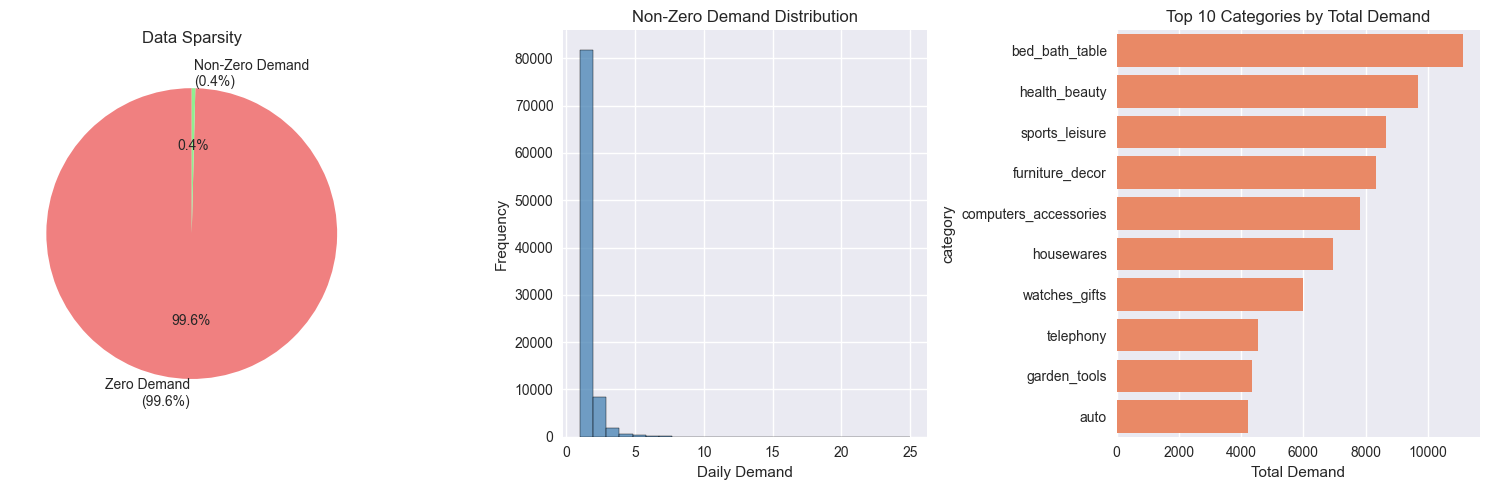

✓ Dataset: 23,599,542 records | Sparsity: 99.6% | Max daily demand: 25.0


In [22]:
# Basic demand stats
print(f"\nDEMAND STATISTICS:")
print(f"Max daily demand: {df['daily_demand'].max()}")
print(f"Mean daily demand: {df['daily_demand'].mean():.2f}")
print(f"Mean (non-zero only): {df[df['daily_demand'] > 0]['daily_demand'].mean():.2f}")

df = df_full.copy()
# Basic counts
total_records = len(df)
zero_demand = (df['daily_demand'] == 0).sum()
non_zero_demand = (df['daily_demand'] > 0).sum()


# Sparsity Analysis - Simple Visual
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sizes = [zero_demand, non_zero_demand]
labels = ['Zero Demand\n(99.6%)', 'Non-Zero Demand\n(0.4%)']
colors = ['lightcoral', 'lightgreen']

axes[0].pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Data Sparsity')

# 2. Non-Zero Demand Distribution
non_zero_data = df[df['daily_demand'] > 0]['daily_demand']
sns.histplot(non_zero_data, bins=25, ax=axes[1], color='steelblue')
axes[1].set_title('Non-Zero Demand Distribution')
axes[1].set_xlabel('Daily Demand')
axes[1].set_ylabel('Frequency')

# 3. Demand by Category (Top 10)
category_demand = df[df['daily_demand'] > 0].groupby('category')['daily_demand'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=category_demand.values, y=category_demand.index, ax=axes[2], color='coral')
axes[2].set_title('Top 10 Categories by Total Demand')
axes[2].set_xlabel('Total Demand')

plt.tight_layout()
plt.show()

print(f"✓ Dataset: {len(df):,} records | Sparsity: 99.6% | Max daily demand: {df['daily_demand'].max()}")


In [23]:
# Sparsity Analysis - Understanding the Problem
print("SPARSITY BREAKDOWN")
print("=" * 40)

# General sparsity (what we calculated)
total_records = len(df)
zero_count = (df['daily_demand'] == 0).sum()
general_sparsity = (zero_count / total_records) * 100

print(f"GENERAL SPARSITY: {general_sparsity:.1f}%")
print(f"  - Total product-date combinations: {total_records:,}")
print(f"  - Days with zero sales: {zero_count:,}")
print(f"  - Days with actual sales: {total_records - zero_count:,}")

# Per-product sparsity
product_sparsity = df.groupby('product_id').agg({
    'daily_demand': lambda x: (x == 0).sum() / len(x) * 100
}).rename(columns={'daily_demand': 'sparsity_pct'})

print(f"\nPER-PRODUCT SPARSITY:")
print(f"  - Average sparsity per product: {product_sparsity['sparsity_pct'].mean():.1f}%")
print(f"  - Products with >95% sparsity: {(product_sparsity['sparsity_pct'] > 95).sum():,}")
print(f"  - Products with <80% sparsity: {(product_sparsity['sparsity_pct'] < 80).sum():,}")

print(f"\nCONCLUSION: This is INTERMITTENT DEMAND - most products sell very rarely!")


SPARSITY BREAKDOWN
GENERAL SPARSITY: 99.6%
  - Total product-date combinations: 23,599,542
  - Days with zero sales: 23,506,173
  - Days with actual sales: 93,369

PER-PRODUCT SPARSITY:
  - Average sparsity per product: 99.6%
  - Products with >95% sparsity: 32,139
  - Products with <80% sparsity: 10

CONCLUSION: This is INTERMITTENT DEMAND - most products sell very rarely!


In [24]:
# save the dataset
df.to_csv('../outputs/daily_data_per_item.csv', index=False)

print(f"\n🎯 DATASET COLUMNS:")
for i, col in enumerate(df.columns, 1):
    print(f"  {i}. {col}")

print(f"\n🌟 READY FOR FORECASTING:")
print("- Clean time series structure")
print("- Product-level granularity") 
print("- Category groupings available")
print("- Price information included")
print("- English category names for interpretability")

# Show all available categories for reference
print(f"\n ALL CATEGORIES ({df['category'].nunique()}):")
categories_sorted = sorted(df['category'].unique())
for i, category in enumerate(categories_sorted, 1):
    total_demand = df[df['category'] == category]['daily_demand'].sum()
    print(f"  {i:2d}. {category} (total: {total_demand:,})")

print(f"\n Next step: Create forecasting models using this daily_data_per_item.csv!")


🎯 DATASET COLUMNS:
  1. product_id
  2. order_date
  3. category
  4. price
  5. daily_demand

🌟 READY FOR FORECASTING:
- Clean time series structure
- Product-level granularity
- Category groupings available
- Price information included
- English category names for interpretability

 ALL CATEGORIES (71):
   1. agro_industry_and_commerce (total: 212.0)
   2. air_conditioning (total: 297.0)
   3. art (total: 209.0)
   4. arts_and_craftmanship (total: 24.0)
   5. audio (total: 364.0)
   6. auto (total: 4,235.0)
   7. baby (total: 3,065.0)
   8. bed_bath_table (total: 11,115.0)
   9. books_general_interest (total: 553.0)
  10. books_imported (total: 60.0)
  11. books_technical (total: 267.0)
  12. cds_dvds_musicals (total: 14.0)
  13. christmas_supplies (total: 153.0)
  14. cine_photo (total: 72.0)
  15. computers (total: 203.0)
  16. computers_accessories (total: 7,827.0)
  17. consoles_games (total: 1,137.0)
  18. construction_tools_construction (total: 929.0)
  19. construction_tools_

## FORECASTING RECOMMENDATIONS

AVOID:
  - Regular ARIMA/SARIMA models (designed for dense data)
  - Standard ML models without modification
  - Daily forecasting for individual products

BETTER APPROACHES:
  1. INTERMITTENT DEMAND METHODS:
     - Croston's Method (classic for sparse data)
     - TSB (Teunter-Syntetos-Babai)
     - ADIDA (Aggregate-Disaggregate)

  2. AGGREGATION STRATEGIES:
     - Forecast by CATEGORY (not individual products)
     - Use WEEKLY/MONTHLY instead of daily
     - Focus on TOP-SELLING products only

  3. MACHINE LEARNING ADAPTATIONS:
     - Zero-Inflated models
     - Hurdle models (model probability of sale + amount)
     - Ensemble: Croston + LightGBM

  4. PRACTICAL FILTERING:")
      - Remove products with <5 sales total")
      - Focus on products with >10% density")
      - Aggregate similar products")

## RECOMMENDED NEXT STEPS:
      - Consider weekly aggregation
      - Try category-level forecasting first
      - Implement Croston's method for comparison
  
